<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling**


In this notebook, we will perform the following:


*   Identify duplicate values in the dataset.

*   Remove duplicate values from the dataset.

*   Identify missing values in the dataset.

*   Impute the missing values in the dataset.

*   Normalize data in the dataset.


Firstly, we import pandas module.


In [2]:
import pandas as pd

We load the dataset into a dataframe.


In [16]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Finding duplicates


We find how many duplicate rows exist in the dataframe.


In [18]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

20

## Removing duplicates


Let's remove the duplicate rows from the dataframe.


In [19]:
df.drop_duplicates(inplace=True)

We verify if duplicates were actually dropped.


In [20]:
df.shape

(65437, 114)

## Finding Missing values


We find the missing values for all columns.


In [26]:
import numpy as np
missing_data = df.isnull()
missing_data.sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

We can find out how many rows are missing in the column 'RemoteWork'


In [29]:
#Counting missing values for a single column

print('RemoteWork')
missing_data['RemoteWork'].value_counts()

RemoteWork


RemoteWork
False    54806
True     10631
Name: count, dtype: int64

In [30]:
#Counting missing values for all columns

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ResponseId
ResponseId
False    65437
Name: count, dtype: int64

MainBranch
MainBranch
False    65437
Name: count, dtype: int64

Age
Age
False    65437
Name: count, dtype: int64

Employment
Employment
False    65437
Name: count, dtype: int64

RemoteWork
RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
Check
False    65437
Name: count, dtype: int64

CodingActivities
CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
DevType
False    59445
True      5992
Name: count, dty

## Imputing missing values


We find the  value counts for the column RemoteWork.


In [38]:
print (df['RemoteWork'].value_counts(dropna=False))  

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64


We identify the value that is most frequent (majority) in the RemoteWork column.


In [40]:
#The most frequent value in RemoteWork column is Office
most_frequent_value = df['RemoteWork'].mode()[0]
most_frequent_value

'Hybrid (some remote, some in-person)'

So, we impute (replace) all the empty rows in the column RemoteWork with the value that you have identified as majority.


In [41]:
df['RemoteWork'].replace(np.nan, most_frequent_value, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1484\3440925923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].replace(np.nan, most_frequent_value, inplace=True)


After imputation there should ideally not be any empty rows in the RemoteWork column.


We verify if imputing was successful.


In [42]:
missing_data = df.isnull()
print('RemoteWork')
print (missing_data['RemoteWork'].value_counts())  
print('')
print('RemoteWork')
print (df['RemoteWork'].value_counts())  

RemoteWork
RemoteWork
False    65437
Name: count, dtype: int64

RemoteWork
RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


What is the majority category under the column **Employment**?

In [58]:
print('Value counts for Employment column:\n', df['Employment'].dropna().str.split(';').explode().str.strip().value_counts())
print('')
print('\nMajority category under the column Employment:\n', df['Employment'].dropna().str.split(';').explode().str.strip().value_counts().idxmax())

Value counts for Employment column:
 Employment
Employed, full-time                                     45162
Independent contractor, freelancer, or self-employed    10726
Student, full-time                                       8626
Employed, part-time                                      4145
Not employed, but looking for work                       3954
Student, part-time                                       2656
Not employed, and not looking for work                   1203
Retired                                                   681
I prefer not to say                                       546
Name: count, dtype: int64


Majority category under the column Employment:
 Employed, full-time


Under the column "EdLevel", which category has the minimum number of rows?

In [59]:
print('Value counts for EdLevel column:\n', df['EdLevel'].dropna().value_counts())
print('')
print('\nMajority category under the column Employment:\n', df['EdLevel'].dropna().value_counts().idxmax())

Value counts for EdLevel column:
 EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


Majority category under the column Employment:
 Bachelor’s degree (B.A., B.S., B.Eng., etc.)


The column ‘ConvertedComp’ contains the annual compensation of the survey respondents. What is the best approach to impute the missing values in this column?

In [17]:
# The best approach to impute missing values is the median

## Normalizing data
Normalize ConvertedCompYearly using Min-Max Scaling.

Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.

In [62]:
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

What is the median **NormalizedAnnualCompensation**?  

In [64]:
df['ConvertedCompYearly_MinMax'].median()

np.float64(0.0039983140388132775)

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly` and `ConvertedCompYearly_Normalized`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized version. This will help you compare how each normalization technique affects the data range and distribution.


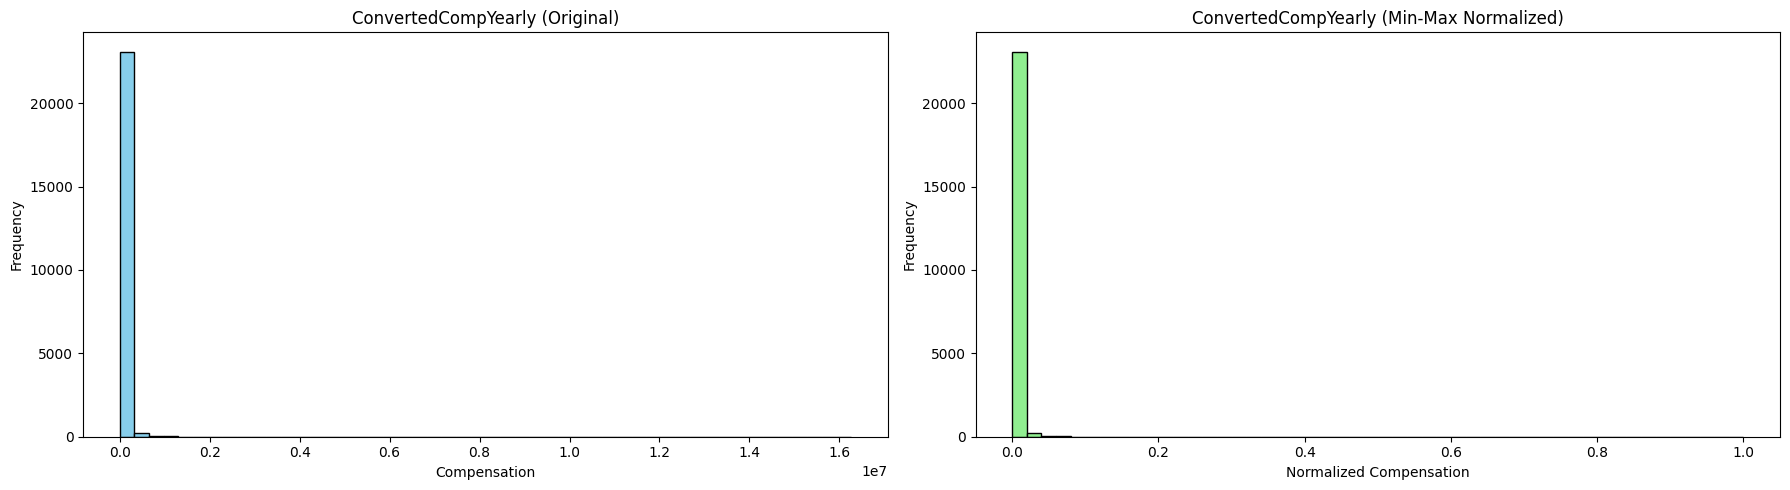

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('ConvertedCompYearly (Original)')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('ConvertedCompYearly (Min-Max Normalized)')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1484\11350109.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ConvertedCompYearly_MinMax'] = (


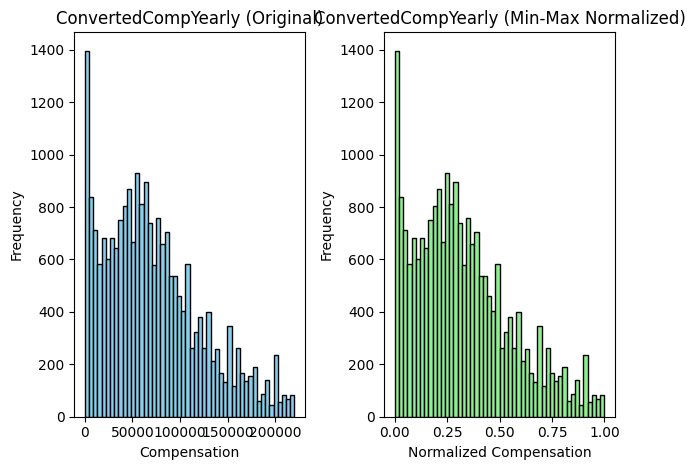

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# ---- Step 1: Min-Max scaling with outliers ----
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) /
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)

# ---- Step 2: Remove outliers (IQR method) ----
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[
    (df['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) &
    (df['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)
]

# Min-Max scaling after outlier removal
df_no_outliers['ConvertedCompYearly_MinMax'] = (
    (df_no_outliers['ConvertedCompYearly'] - df_no_outliers['ConvertedCompYearly'].min()) /
    (df_no_outliers['ConvertedCompYearly'].max() - df_no_outliers['ConvertedCompYearly'].min())
)


plt.subplot(1, 2, 1)
plt.hist(df_no_outliers['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('ConvertedCompYearly (Original)')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_no_outliers['ConvertedCompYearly_MinMax'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('ConvertedCompYearly (Min-Max Normalized)')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
